# [Matplotlib](https://matplotlib.org/stable/)

Matplotlib – это библиотека на языке Python для визуализации данных. Она позволяет создавать разнообразные графики, диаграммы, гистограммы, карты и другие типы визуализации данных. Для [установки](https://matplotlib.org/stable/users/installing/index.html) пакета matplotlib достаточно в терминале выполнить команду `pip install matplotlib`.

Основные понятия и способы использования описаны в [быстром старте](https://matplotlib.org/stable/users/explain/quick_start.html). Примеры различных диаграмм можно посмотреть в [галерее](https://matplotlib.org/stable/gallery/index.html).

## Генерация данных

Для начала создадим массивы для визуализации данных. В качестве входных данных рекомендуется использовать массивы NumPy. Первым делом создадим набор точек для абсцисс при помощи функции `linspase()`, которая создает последовательность чисел в заданном диапазоне. Первые два аргумента - границы диапазона; третий аргумент задает количество точек, на которое разбивается диапазон. Заметим, что правая граница тоже входит в образующуюся последовательность. В данном случае диапазон задается границами -5 и 10, и этот диапазон разбивается на 16 точек.

In [2]:
import numpy as np

x = np.linspace(-5, 10, 16)
print(x, '\nlenght:', len(x))

[-5. -4. -3. -2. -1.  0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.] 
lenght: 16


Теперь создадим три последовательности, соответствующие ординатам. В первом наборе будут содержаться точки, выражающие линейную зависимость от точек в массиве `x`. Во втором и третьем наборе будут содержаться точки, выражающие квадратичную и кубическую зависимости.

In [3]:
y1 = 25. * x                # линейная зависимость
y2 = 4.0 * x ** 2           # квадратичная зависимость
y3 = 0.5 * x ** 3           # кубическая зависимость

# напечатаем сгенерированные данные в наглядном виде:
print(f"  x\t  y1\t  y2\t  y3")
for i in range(len(x)):
    print(f"{x[i]}\t{y1[i]}\t{y2[i]}\t{y3[i]}")

  x	  y1	  y2	  y3
-5.0	-125.0	100.0	-62.5
-4.0	-100.0	64.0	-32.0
-3.0	-75.0	36.0	-13.5
-2.0	-50.0	16.0	-4.0
-1.0	-25.0	4.0	-0.5
0.0	0.0	0.0	0.0
1.0	25.0	4.0	0.5
2.0	50.0	16.0	4.0
3.0	75.0	36.0	13.5
4.0	100.0	64.0	32.0
5.0	125.0	100.0	62.5
6.0	150.0	144.0	108.0
7.0	175.0	196.0	171.5
8.0	200.0	256.0	256.0
9.0	225.0	324.0	364.5
10.0	250.0	400.0	500.0


Объединим созданные массивы в единый двумерный массив, используя функцию `column_stack()`. Объединяемые массивы передадим в качестве рагумента в виде кортежа.

In [4]:
data = np.column_stack((x, y1, y2, y3))
np.savetxt('data.csv', data, fmt='%s',
           delimiter=',', header=('x,y1,y2,y3'))

print(f"Shape = {data.shape}")
print(data)

Shape = (16, 4)
[[  -5.  -125.   100.   -62.5]
 [  -4.  -100.    64.   -32. ]
 [  -3.   -75.    36.   -13.5]
 [  -2.   -50.    16.    -4. ]
 [  -1.   -25.     4.    -0.5]
 [   0.     0.     0.     0. ]
 [   1.    25.     4.     0.5]
 [   2.    50.    16.     4. ]
 [   3.    75.    36.    13.5]
 [   4.   100.    64.    32. ]
 [   5.   125.   100.    62.5]
 [   6.   150.   144.   108. ]
 [   7.   175.   196.   171.5]
 [   8.   200.   256.   256. ]
 [   9.   225.   324.   364.5]
 [  10.   250.   400.   500. ]]


## Визуализация данных
Есть три способа использования Matplotlib:
- явное создание объектов классов `Figure` и `Axes`, и вызов их методов (*object-oriented style* – OO-style);
- позволить `pyplot` автоматически создать оъекты `Figure` и `Axes` и управлять ими. Пользователь при этом использует функции модуля `pyplot` (*pyplot-style*);
- третий способ связан со встраиванием Matplotlib в GUI интерфейс

Визуализируем сгенерированные данные на одном графике в OO-style и pyplot-style.

### OO-style

Функция `subplots()` возвращает два объекта: объект класса `Figure`, и объект класса `Axes`. Объект `Figure` представляет собой в целом изображение, на котором может быть размещено несколько диаграмм (в частном случае - одна). Объект `Axes` представляет собой область, на которой рисуется диаграмма. Если на изображении планируется размещение нескольких диаграмм, то `subplots()` вторым объектом вернет массив объектов класса `Axes`. 

Объект `Figure` используется для задания общих характеристик изображения. Для того, чтобы задать элементы диаграммы (линии, точки, шкалы, подписи) используется объект класса `Axes`. Все эти элементы, включая объект `Axes` и даже `Figure` наследуют базовый класс `Artist`.

Метод `scatter()` рисует точки, а `plot()` рисует линии. Первый аргумент: массив точек для оси абсцисс, второй аркумент: массив точек для оси ординат. Длины этих массивов должны совпадать. Именованный аргумент `label` позволяет создать метку для графика, которая будет отображаться в легенде. 

Так, вызывая соответствующие методы объекта класса `Axes` мы задаем элементы и их характеристики, которые мы хотим отобразить на диаграмме. Затем вызывая функцию `plt.plot()` производится непосредственно отрисовка изображения.

> В ячейках Jupyter можно вызов функции `plt.plot()` производится автоматически, поэтому его можно не прописывать.

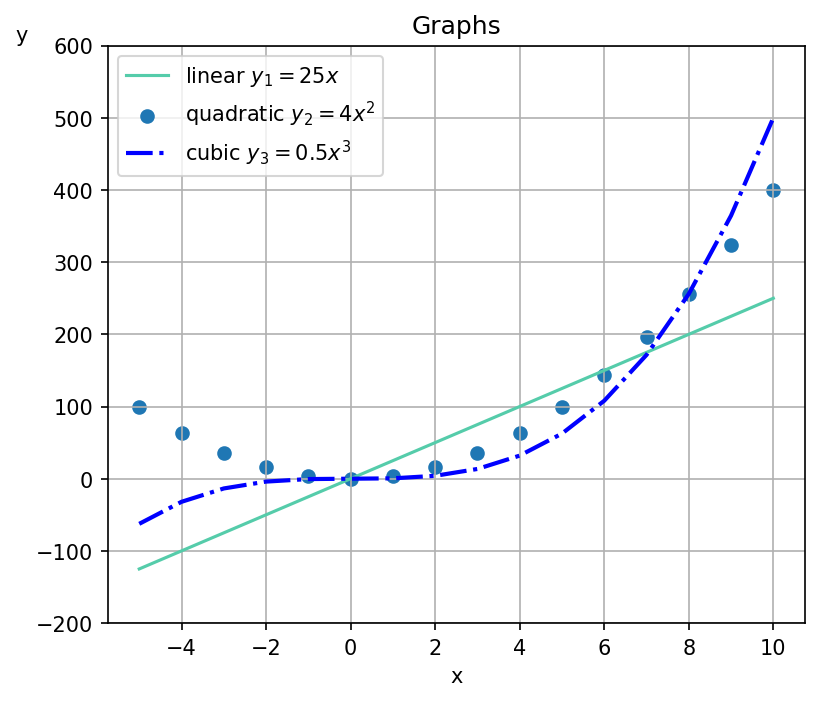

In [20]:
import matplotlib.pyplot as plt

# создаем явно объекты fig класса Figure и ax класса Axes:
fig, ax = plt.subplots(figsize=(6, 5), dpi=150)

ax.plot(x, y1, label='linear $y_1=25x$', color='#5ca')
ax.scatter(x, y2, label='quadratic $y_2=4x^2$')

ax.plot(x, y3,                          # координаты
         color='blue',                  # цвет линии
         label='cubic $y_3=0.5x^3$',    # название легенды
         linestyle='-.',                # стиль линии (пунктир)
         linewidth=2)                   # толщина линии


ax.legend()                 # отображать легенды
ax.grid()                   # отображать сетку
ax.set_xlabel('x')          # подпись для оси абсцисс
ax.set_ylabel('y', loc='top', rotation=0)
ax.set_title('Graphs')      # заголовок для графика
ax.set_ylim(-200, 600)      # границы для оси ординат

plt.show()

Получившееся изображение можно скопировать или сохранить на локальном диске.

### pyplot-style

В pyplot-style задание фигуры и элементов отрисовки производится при помощи функций из модуля `pytplot`. Вместо вызова методов объекта класса `Axes` производится вызов соответствующих функций, при котором matplotlib самостоятельно создает нужные объекты для отрисовки.

> Следует иметь в виду, что при этом `matplotlib` создает объекты `Figure` и `Axis`. Получить к ним доступ можно при помощи функций `gcf()` и `gca()`, соответственно. Если на эти объекты нет будет явной ссылки, то после отрисовки они будут удалены из памяти.

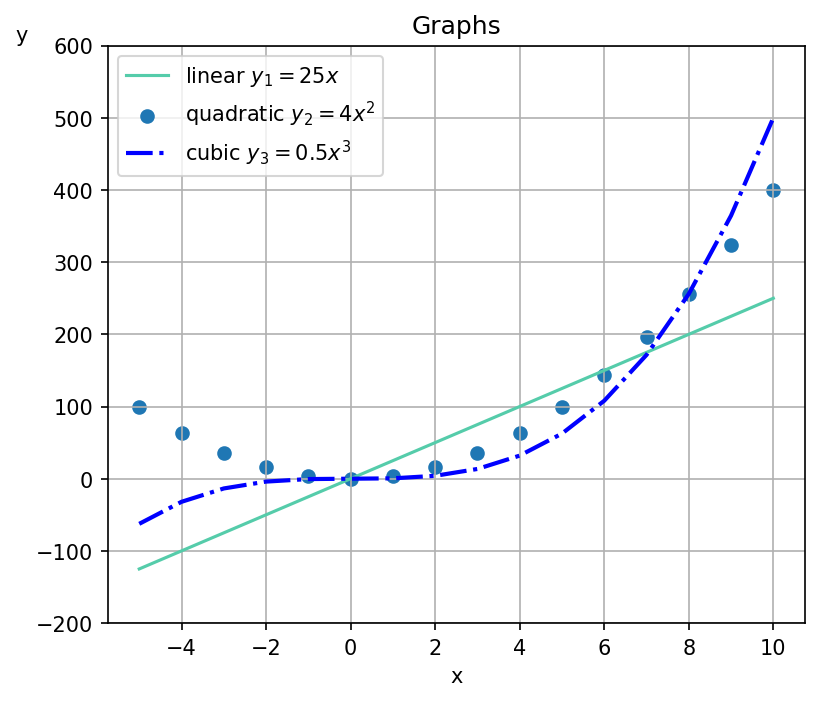

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 5), dpi=150)     # задается размер изображения 
                                        # и его разрешение (dpi)
plt.plot(x, y1, label='linear $y_1=25x$', color='#5ca')
plt.scatter(x, y2, label='quadratic $y_2=4x^2$')

plt.plot(x, y3,                         # координаты
         color='blue',                  # цвет линии
         label='cubic $y_3=0.5x^3$',    # название легенды
         linestyle='-.',                # стиль линии (пункктир)
         linewidth=2)                   # толщина линии

plt.legend()            # отображать легенды
plt.xlabel('x')         # подпись для оси абсцисс
plt.ylabel('y', loc='top', rotation=0)
plt.title('Graphs')     # заголовок для графика
plt.ylim(-200, 600)     # границы для оси ординат
plt.grid()

# ax = plt.gca()          # возвращает объект Axes
# ax.grid()               # отображать сетку

## Несколько диаграмм на одном изображении

In [24]:
def f1(t):
    return np.exp(-t) * np.cos(2*np.pi*t)
def f2(t):
    return np.exp(-2*t) * np.cos(2*np.pi*t)
def f3(t):
    return np.exp(-t) * t * np.cos(2*np.pi*t)
def f4(t):
    return np.exp(-2*t) * t * np.cos(2*np.pi*t)

t = np.arange(0.0, 3.0, 0.01)

Функция [`tight_layout()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.tight_layout.html) позволяет отрегулировать отступы между диаграммами.

[[<Axes: > <Axes: >]
 [<Axes: > <Axes: >]]


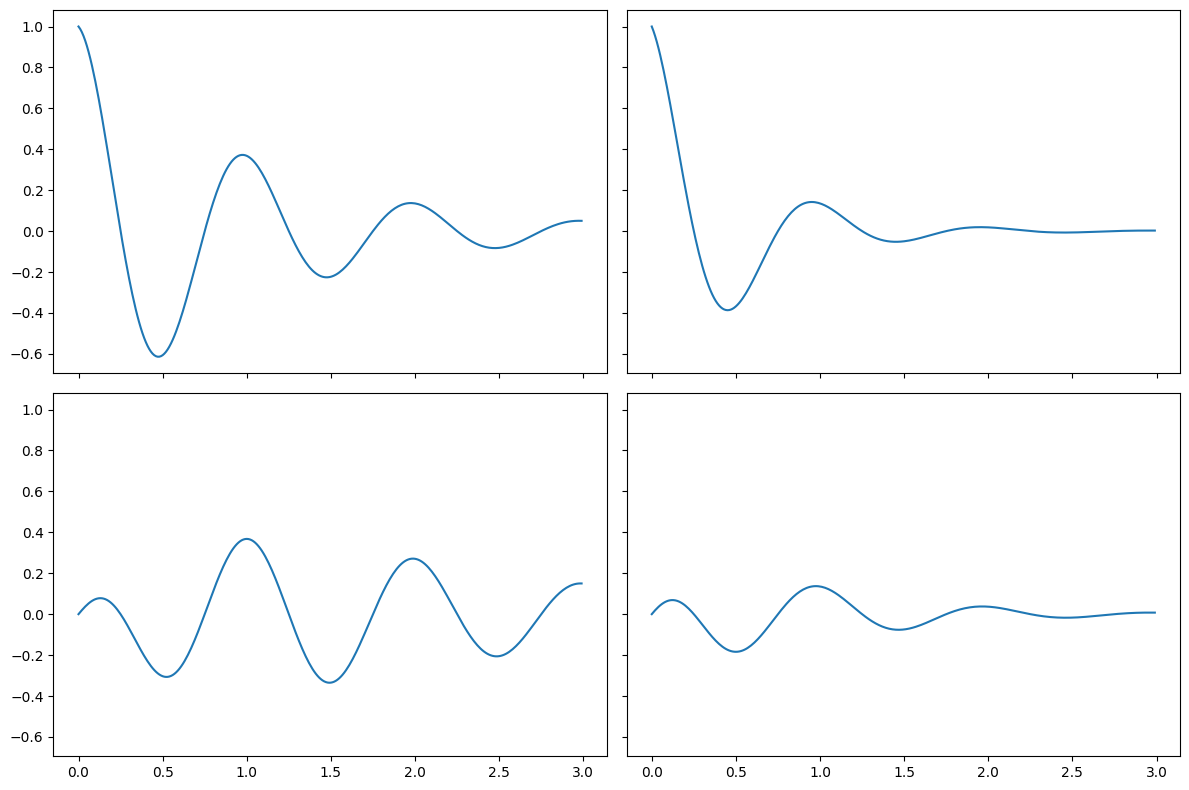

In [33]:
fig, ax = plt.subplots(2, 2, sharex=True, sharey=True)
print(ax)
fig.set_size_inches(12, 8)
ax[0, 0].plot(t, f1(t))
ax[0, 1].plot(t, f2(t))
ax[1, 0].plot(t, f3(t))
ax[1, 1].plot(t, f4(t))
plt.tight_layout()          # регулирует зазор между графики